1. Importing dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Saved from Chrome/dataset.csv')

In [ ]:
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
0,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,0.0,6.29,1
1,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,0.0,6.34,1
2,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.0,6.35,1
3,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.0,6.20,1
4,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.0,6.26,1


2. Finding unique teams and then replace extra teams with new teams or drop them.

In [ ]:
unique_teams = df['batting_team'].unique()
unique_teams

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [ ]:
#Replacing Rising pune supergiants with CSK

df['batting_team'] = df['batting_team'].replace('Rising Pune Supergiants', 'Chennai Super Kings')
df['bowling_team'] = df['bowling_team'].replace('Rising Pune Supergiants', 'Chennai Super Kings')

In [ ]:
df['batting_team'] = df['batting_team'].replace('Rising Pune Supergiant', 'Chennai Super Kings')
df['bowling_team'] = df['bowling_team'].replace('Rising Pune Supergiant', 'Chennai Super Kings')

In [ ]:
# Get the initial number of rows for comparison
initial_row_count = len(df)

# Drop rows where either batting_team or bowling_team is 'Kochi Tuskers Kerala'
df = df[(df['batting_team'] != 'Kochi Tuskers Kerala') & (df['bowling_team'] != 'Kochi Tuskers Kerala')]

# Get the final number of rows
final_row_count = len(df)

# Print the number of rows dropped
print(f"Number of rows dropped: {initial_row_count - final_row_count}")
print(f"Remaining rows: {final_row_count}")

# Verify that 'Kochi Tuskers Kerala' is no longer in the dataset
print("\nChecking if 'Kochi Tuskers Kerala' still exists in batting_team:")
print('Kochi Tuskers Kerala' in df['batting_team'].unique())

print("\nChecking if 'Kochi Tuskers Kerala' still exists in bowling_team:")
print('Kochi Tuskers Kerala' in df['bowling_team'].unique())

Number of rows dropped: 1407
Remaining rows: 105197

Checking if 'Kochi Tuskers Kerala' still exists in batting_team:
False

Checking if 'Kochi Tuskers Kerala' still exists in bowling_team:
False


In [ ]:
# Replace 'Gujarat Lions' with 'Gujarat Titans' in both columns
df['batting_team'] = df['batting_team'].replace('Gujarat Lions', 'Gujarat Titans')
df['bowling_team'] = df['bowling_team'].replace('Gujarat Lions', 'Gujarat Titans')

# Verify the changes
print("Checking if 'Gujarat Lions' still exists in batting_team:")
print('Gujarat Lions' in df['batting_team'].unique())

print("\nChecking if 'Gujarat Lions' still exists in bowling_team:")
print('Gujarat Lions' in df['bowling_team'].unique())

print("\nChecking if 'Gujarat Titans' now exists in batting_team:")
print('Gujarat Titans' in df['batting_team'].unique())

print("\nChecking if 'Gujarat Titans' now exists in bowling_team:")
print('Gujarat Titans' in df['bowling_team'].unique())

# Print unique team names after replacement (optional)
print("\nUnique batting teams after replacement:")
print(sorted(df['batting_team'].unique()))

Checking if 'Gujarat Lions' still exists in batting_team:
False

Checking if 'Gujarat Lions' still exists in bowling_team:
False

Checking if 'Gujarat Titans' now exists in batting_team:
True

Checking if 'Gujarat Titans' now exists in bowling_team:
True

Unique batting teams after replacement:
['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [ ]:
# Replace 'Pune Warriors' with 'Punjab Kings' in both columns
df['batting_team'] = df['batting_team'].replace('Pune Warriors', 'Punjab Kings')
df['bowling_team'] = df['bowling_team'].replace('Pune Warriors', 'Punjab Kings')

# Verify the changes
print("Checking if 'Pune Warriors' still exists in batting_team:")
print('Pune Warriors' in df['batting_team'].unique())

print("\nChecking if 'Pune Warriors' still exists in bowling_team:")
print('Pune Warriors' in df['bowling_team'].unique())

print("\nChecking if 'Punjab Kings' now exists in batting_team:")
print('Punjab Kings' in df['batting_team'].unique())

print("\nChecking if 'Punjab Kings' now exists in bowling_team:")
print('Punjab Kings' in df['bowling_team'].unique())

# Print all unique teams after replacements
print("\nAll unique teams after replacements:")
all_teams = sorted(set(list(df['batting_team'].unique()) + list(df['bowling_team'].unique())))
for team in all_teams:
    print(team)

Checking if 'Pune Warriors' still exists in batting_team:
False

Checking if 'Pune Warriors' still exists in bowling_team:
False

Checking if 'Punjab Kings' now exists in batting_team:
True

Checking if 'Punjab Kings' now exists in bowling_team:
True

All unique teams after replacements:
Chennai Super Kings
Delhi Capitals
Gujarat Titans
Kolkata Knight Riders
Lucknow Super Giants
Mumbai Indians
Punjab Kings
Rajasthan Royals
Royal Challengers Bangalore
Sunrisers Hyderabad


3. Dropping where batting teams equal to bowing team (after replacing or dropping irrelevent teams)

In [ ]:
# Get the initial number of rows for comparison
initial_row_count = len(df)

# Drop rows where batting_team equals bowling_team
df = df[df['batting_team'] != df['bowling_team']]

# Get the final number of rows
final_row_count = len(df)

# Print the number of rows dropped
print(f"Number of rows dropped: {initial_row_count - final_row_count}")
print(f"Remaining rows: {final_row_count}")

# Check if there are any remaining rows where batting_team equals bowling_team
same_team_rows = df[df['batting_team'] == df['bowling_team']]
print(f"\nNumber of rows where batting_team equals bowling_team: {len(same_team_rows)}")

if len(same_team_rows) > 0:
    print("Warning: Some rows still have batting_team equal to bowling_team")
    print(same_team_rows.head())
else:
    print("Confirmed: No rows have batting_team equal to bowling_team")

Number of rows dropped: 8919
Remaining rows: 96278

Number of rows where batting_team equals bowling_team: 0
Confirmed: No rows have batting_team equal to bowling_team


4. To check and drop if there any rows where ball left is equal to 0.

In [ ]:
# Get the initial number of rows for comparison
initial_row_count = len(df)

# Drop rows where remaining_balls is 0
df = df[df['balls_left'] != 0]

# Get the final number of rows
final_row_count = len(df)

# Print the number of rows dropped
print(f"Number of rows dropped: {initial_row_count - final_row_count}")
print(f"Remaining rows: {final_row_count}")

# Check if there are any remaining rows where remaining_balls equals 0
zero_balls_rows = df[df['balls_left'] == 0]
print(f"\nNumber of rows where remaining_balls equals 0: {len(zero_balls_rows)}")

if len(zero_balls_rows) > 0:
    print("Warning: Some rows still have remaining_balls equal to 0")
    print(zero_balls_rows.head())
else:
    print("Confirmed: No rows have remaining_balls equal to 0")

Number of rows dropped: 0
Remaining rows: 96278

Number of rows where remaining_balls equals 0: 0
Confirmed: No rows have remaining_balls equal to 0


6. Now replacing/updating all city venues as per 2025 IPL schedule.

In [ ]:
# Get all unique cities
unique_cities = df['city'].unique()

# Sort the cities alphabetically (optional)
unique_cities.sort()

# Print the list of unique cities
print("List of all unique cities:")
for city in unique_cities:
    print(city)


List of all unique cities:
Abu Dhabi
Ahmedabad
Bangalore
Bengaluru
Bloemfontein
Cape Town
Centurion
Chandigarh
Chennai
Cuttack
Delhi
Dharamsala
Dubai
Durban
East London
Guwahati
Hyderabad
Indore
Jaipur
Johannesburg
Kanpur
Kimberley
Kolkata
Lucknow
Mumbai
Nagpur
Navi Mumbai
Port Elizabeth
Pune
Raipur
Rajkot
Ranchi
Sharjah
Visakhapatnam


In [ ]:
# Define the mapping of cities based on the provided table
city_mapping = {
    # Kolkata group
    'Abu Dhabi': 'Kolkata',
    'Dubai': 'Kolkata',
    'Sharjah': 'Kolkata',

    # Ahmedabad group
    'Johannesburg': 'Ahmedabad',
    'Centurion': 'Ahmedabad',
    'Kimberley': 'Ahmedabad',

    # Bengaluru group
    'Cape Town': 'Bengaluru',
    'Durban': 'Bengaluru',
    'Port Elizabeth': 'Bengaluru',
    'Bangalore': 'Bengaluru',

    # Chennai group
    'Bloemfontein': 'Chennai',

    # Mumbai group
    'Navi Mumbai': 'Mumbai',

    # Delhi group
    'Cuttack': 'Delhi',

    # Hyderabad group
    'Raipur': 'Hyderabad',

    # Jaipur group
    'Indore': 'Jaipur',
    'Nagpur': 'Jaipur',

    # Guwahati group
    'Chandigarh': 'Guwahati',

    # Dharamsala group
    'East London': 'Dharamsala',

    # Mullanpur/New Chandigarh group
    'Ranchi': 'Mullanpur/New Chandigarh',
    # Visakhapatnam group
    'Rajkot': 'Visakhapatnam',
    'Pune': 'Visakhapatnam',

    # Lucknow group (newly added)
    'Kanpur': 'Lucknow'
}

# Main cities that should remain as they are
main_cities = [
    'Kolkata', 'Ahmedabad', 'Bengaluru', 'Chennai', 'Mumbai',
    'Delhi', 'Hyderabad', 'Jaipur', 'Guwahati', 'Dharamsala',
    'Mullanpur/New Chandigarh', 'Visakhapatnam', 'Lucknow'  # Added Lucknow
]

def map_city(city):
    # If the city is already a main city, keep it as is
    if city in main_cities:
        return city
    # If the city is in our mapping, convert it
    elif city in city_mapping:
        return city_mapping[city]
    # Otherwise, return the original city
    else:
        return city

# First, make a copy of the original city column
df['original_city'] = df['city'].copy()

# Then apply the mapping
df['city'] = df['city'].apply(map_city)

# Print the results
print("Number of cities before grouping:", df['original_city'].nunique())
print("Number of cities after grouping:", df['city'].nunique())

# Check which cities were grouped
print("\nCities after grouping:")
for city in sorted(df['city'].unique()):
    original_cities = sorted(df[df['city'] == city]['original_city'].unique())
    if len(original_cities) > 1 or original_cities[0] != city:
        print(f"{city}: {', '.join(original_cities)}")

# Check if any cities were not mapped to the main cities
unmapped_cities = [city for city in df['city'].unique() if city not in main_cities]
if unmapped_cities:
    print("\nCities not in the main city list:")
    for city in sorted(unmapped_cities):
        print(city)

Number of cities before grouping: 34
Number of cities after grouping: 13

Cities after grouping:
Ahmedabad: Ahmedabad, Centurion, Johannesburg, Kimberley
Bengaluru: Bangalore, Bengaluru, Cape Town, Durban, Port Elizabeth
Chennai: Bloemfontein, Chennai
Delhi: Cuttack, Delhi
Dharamsala: Dharamsala, East London
Guwahati: Chandigarh, Guwahati
Hyderabad: Hyderabad, Raipur
Jaipur: Indore, Jaipur, Nagpur
Kolkata: Abu Dhabi, Dubai, Kolkata, Sharjah
Lucknow: Kanpur, Lucknow
Mullanpur/New Chandigarh: Ranchi
Mumbai: Mumbai, Navi Mumbai
Visakhapatnam: Pune, Rajkot, Visakhapatnam


7. Count No of rows in each cities

Number of rows in each city:
Mumbai: 18983 rows
Kolkata: 15517 rows
Bengaluru: 11638 rows
Chennai: 8774 rows
Visakhapatnam: 7590 rows
Delhi: 7527 rows
Hyderabad: 7318 rows
Jaipur: 6094 rows
Ahmedabad: 5228 rows
Guwahati: 4440 rows
Dharamsala: 1256 rows
Lucknow: 1110 rows
Mullanpur/New Chandigarh: 803 rows


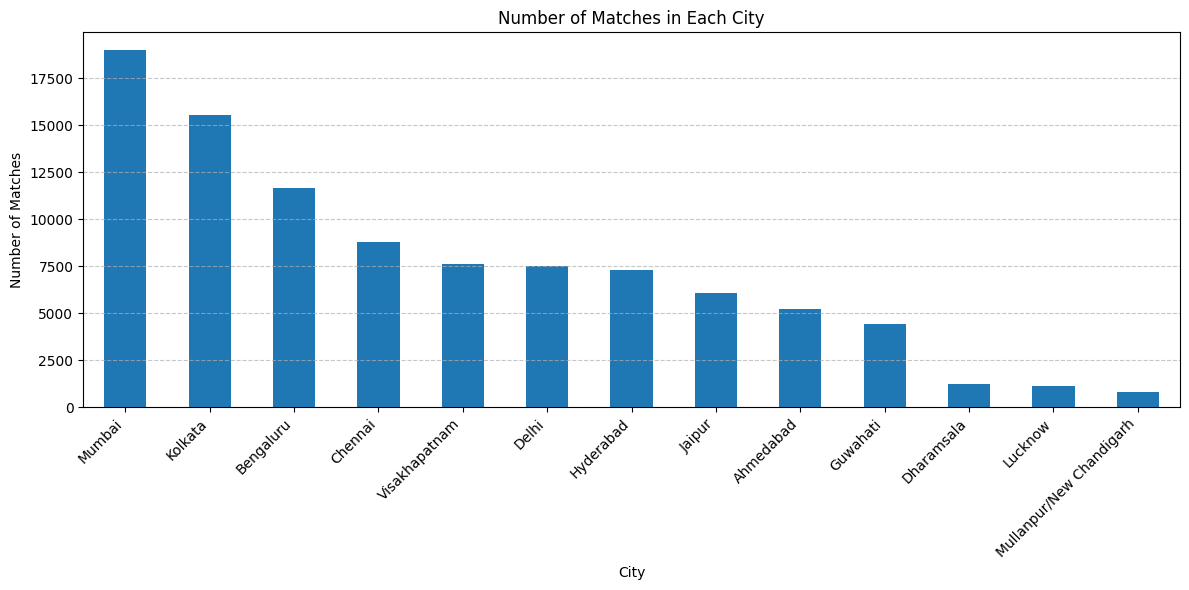


Percentage distribution:
Mumbai: 19.72%
Kolkata: 16.12%
Bengaluru: 12.09%
Chennai: 9.11%
Visakhapatnam: 7.88%
Delhi: 7.82%
Hyderabad: 7.60%
Jaipur: 6.33%
Ahmedabad: 5.43%
Guwahati: 4.61%
Dharamsala: 1.30%
Lucknow: 1.15%
Mullanpur/New Chandigarh: 0.83%

Breakdown of original cities within each grouped city:

Ahmedabad (5228 total rows):
  - Ahmedabad: 3111 rows
  - Centurion: 1208 rows
  - Johannesburg: 568 rows
  - Kimberley: 341 rows

Bengaluru (11638 total rows):
  - Bangalore: 6587 rows
  - Bengaluru: 2461 rows
  - Durban: 1352 rows
  - Port Elizabeth: 655 rows
  - Cape Town: 583 rows

Chennai (8774 total rows):
  - Chennai: 8531 rows
  - Bloemfontein: 243 rows

Delhi (7527 total rows):
  - Delhi: 6722 rows
  - Cuttack: 805 rows

Dharamsala (1256 total rows):
  - Dharamsala: 1043 rows
  - East London: 213 rows

Guwahati (4440 total rows):
  - Chandigarh: 4194 rows
  - Guwahati: 246 rows

Hyderabad (7318 total rows):
  - Hyderabad: 7089 rows
  - Raipur: 229 rows

Jaipur (6094 total 

In [ ]:
# Count rows for each city after grouping
city_counts = df['city'].value_counts().sort_values(ascending=False)

# Print the number of rows for each city
print("Number of rows in each city:")
for city, count in city_counts.items():
    print(f"{city}: {count} rows")

# Optional: Create a bar chart to visualize the distribution
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    city_counts.plot(kind='bar')
    plt.title('Number of Matches in Each City')
    plt.xlabel('City')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the chart in notebook
    plt.show()
except ImportError:
    print("\nNote: Install matplotlib to visualize this data as a bar chart")

# Optional: Calculate the percentage distribution
total_rows = len(df)
print("\nPercentage distribution:")
for city, count in city_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{city}: {percentage:.2f}%")

# Optional: See the distribution of original cities within each grouped city
print("\nBreakdown of original cities within each grouped city:")
for city in sorted(df['city'].unique()):
    original_city_counts = df[df['city'] == city]['original_city'].value_counts()
    print(f"\n{city} ({sum(original_city_counts)} total rows):")
    for original_city, count in original_city_counts.items():
        print(f"  - {original_city}: {count} rows")

In [ ]:
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results,original_city
0,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,0.0,6.29,1,Ahmedabad
1,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,0.0,6.34,1,Ahmedabad
2,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.0,6.35,1,Ahmedabad
3,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.0,6.20,1,Ahmedabad
4,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.0,6.26,1,Ahmedabad


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['runs_left'].plot(kind='hist', bins=20, title='runs_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['balls_left'].plot(kind='hist', bins=20, title='balls_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['crr'].plot(kind='hist', bins=20, title='crr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='runs_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='runs_left', y='balls_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='balls_left', y='crr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='crr', y='rrr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['runs_left']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('runs_left')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['balls_left']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('balls_left')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['crr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('crr')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rrr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rrr')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['runs_left'].plot(kind='line', figsize=(8, 4), title='runs_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['balls_left'].plot(kind='line', figsize=(8, 4), title='balls_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['crr'].plot(kind='line', figsize=(8, 4), title='crr')
plt.gca().spines[['top', 'right']].set_visible(False)

8. Saving new processed dataset to drive

In [ ]:
df.to_csv('/content/drive/MyDrive/ipl_data_processed.csv', index=False)
print("DataFrame saved as CSV to Google Drive at: /content/drive/MyDrive/ipl_data_processed.csv")

DataFrame saved as CSV to Google Drive at: /content/drive/MyDrive/ipl_data_processed.csv


In [ ]:
df.drop('original_city', axis=1, inplace=True)

In [ ]:
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
0,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,0.0,6.29,1
1,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,0.0,6.34,1
2,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.0,6.35,1
3,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.0,6.20,1
4,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.0,6.26,1


In [ ]:
df.to_csv('/content/drive/MyDrive/ipl_data_processed.csv', index=False)
print("DataFrame saved as CSV to Google Drive at: /content/drive/MyDrive/ipl_data_processed.csv")

DataFrame saved as CSV to Google Drive at: /content/drive/MyDrive/ipl_data_processed.csv
